In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import scipy.stats as sp
from filterpy.monte_carlo import systematic_resample

In [2]:
import DATA_GEN
import SIS_logisticReg as SIS
import Testing
import Stats

In [241]:
# generating data
N = 1000
class_prob = np.array([0.3, 0.7])
alpha = 1.0
mu = np.array([-alpha, alpha])
cov = np.array([[2, 1], [1, 2]])
x, y_class, class0, class1 = DATA_GEN.data_gen(N, class_prob, mu, cov)

In [242]:
# find classification boundary
clf = LinearSVC()
clf.fit(x, y_class)
boundary = clf.coef_[0]/np.linalg.norm(clf.coef_[0])
print("classification boundary =", boundary)
print("classification accuracy =", accuracy_score(y_class, clf.predict(x)))

classification boundary = [ 0.69877753 -0.71533905]
classification accuracy = 0.94


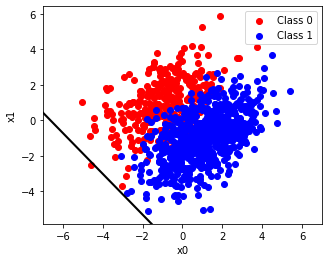

In [243]:
# Plotting data
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim(-7.0,7.0)
ax.scatter(class0[:,0], class0[:,1], color='red', label="Class 0")
ax.scatter(class1[:,0], class1[:,1], color='blue', label="Class 1")
quiv = ax.quiver(-7.5, 1.0, boundary[0], boundary[1], scale=0.37, scale_units='inches')
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
#plt.savefig('T3.jpg')
plt.show()

In [244]:
# Probability of class0
y_prob = DATA_GEN.prob(x, boundary)

In [107]:
# Task 3- PF
L = 100
Q = 10.0
R = 1.0
T = 250
x_compat = x.T
theta, w = SIS.SIS(T, L, x_compat, y_prob, Q, R)

C:\Users\Carl\Documents\Year4\Semester2\Reinforcement_Learning\Labs\ParticleFilter\SIS_logisticReg.py:12: RuntimeWarning: overflow encountered in exp
  y_hat[l] = float(1 / (1 + np.exp(-np.dot(theta[l], x))))


In [108]:
# compute point estimate and variance
theta_av, theta_var = SIS.estimate(T, theta, w, L)

In [109]:
# show estimated sample size
ess = np.zeros(T)
for n in range(T):
    ess[n] = Stats.neff(w[n])

Text(0.5, 1, 'Effective Sample Size')

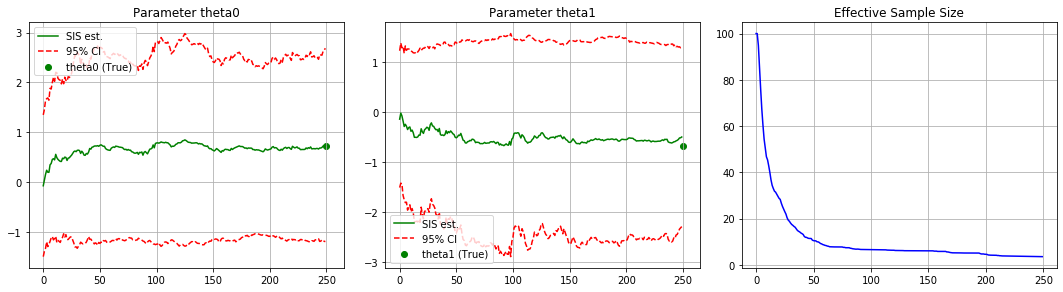

In [110]:
# plot estimate and 95% CI
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.tight_layout()

#ax[0].set_ylim(0.8,1.5)
ax[0].plot(range(T), theta_av[:T,0], color='green', label="SIS est.")
ax[0].plot(range(T), theta_av[:T,0]+ 2*np.sqrt(theta_var[:,0]), "--", color="r", label="95% CI")
ax[0].plot(range(T), theta_av[:T,0]- 2*np.sqrt(theta_var[:,0]), "--", color="r")
ax[0].scatter(T, boundary[0], color='g', label="theta0 (True)")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("Parameter theta0")

#ax[1].set_ylim(-0.8,0.1)
#ax[1].plot(range(T), a_clean[:,1], color='m', label="theta1 True")
ax[1].plot(range(T), theta_av[:T,1], color='green', label="SIS est.")
ax[1].plot(range(T), theta_av[:T,1]+ 2*np.sqrt(theta_var[:,1]), "--", color="r", label="95% CI")
ax[1].plot(range(T), theta_av[:T,1]- 2*np.sqrt(theta_var[:,1]), "--", color="r")
ax[1].scatter(T, boundary[1], color='green', label="theta1 (True)")
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("Parameter theta1")

ax[2].plot(range(T), ess, color='b')
ax[2].grid(True)
ax[2].set_title("Effective Sample Size")

#plt.savefig("SIS.png")

In [111]:
print(((theta_av[T-1,0]-boundary[0])**2)**0.5)
print(((theta_av[T-1,1]-boundary[1])**2)**0.5)
print(ess[T-1])

0.0194817361880687
0.18931100322258326
3.5401031063564905


In [245]:
theta1, w1 = SIS.SIR(T, L, x_compat, y_prob, Q, R)

C:\Users\Carl\Documents\Year4\Semester2\Reinforcement_Learning\Labs\ParticleFilter\SIS_logisticReg.py:12: RuntimeWarning: overflow encountered in exp
  y_hat[l] = float(1 / (1 + np.exp(-np.dot(theta[l], x))))


In [246]:
# compute point estimate and variance
theta_av1, theta_var1 = SIS.estimate(T, theta1, w1, L)

In [247]:
# show estimated sample size
ess1 = np.zeros(T)
for n in range(T):
    ess1[n] = Stats.neff(w1[n])

Text(0.5, 1, 'Effective Sample Size')

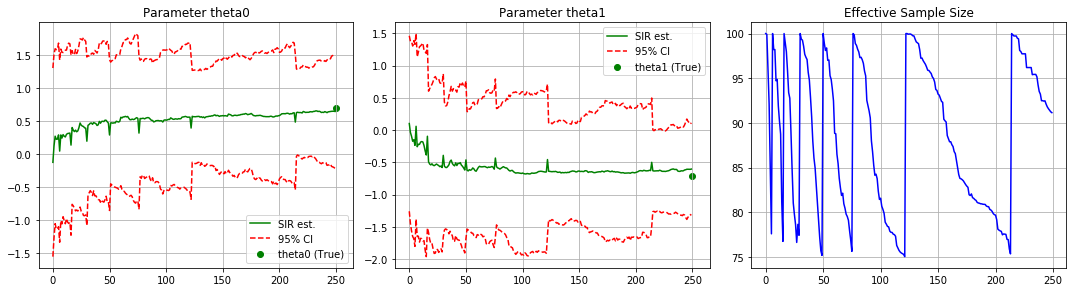

In [248]:
# plot estimate and 95% CI
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.tight_layout()

ax[0].plot(range(T), theta_av1[:T,0], color='green', label="SIR est.")
ax[0].plot(range(T), theta_av1[:T,0]+ 2*np.sqrt(theta_var1[:,0]), "--", color="r", label="95% CI")
ax[0].plot(range(T), theta_av1[:T,0]- 2*np.sqrt(theta_var1[:,0]), "--", color="r")
ax[0].scatter(T, boundary[0], color='green', label="theta0 (True)")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("Parameter theta0")

ax[1].plot(range(T), theta_av1[:T,1], color='green', label="SIR est.")
ax[1].plot(range(T), theta_av1[:T,1]+ 2*np.sqrt(theta_var1[:,1]), "--", color="r", label="95% CI")
ax[1].plot(range(T), theta_av1[:T,1]- 2*np.sqrt(theta_var1[:,1]), "--", color="r")
ax[1].scatter(T, boundary[1], color='green', label="theta1 (True)")
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("Parameter theta1")

ax[2].plot(range(T), ess1, color='b')
ax[2].grid(True)
ax[2].set_title("Effective Sample Size")

#plt.savefig("SIR_T3.png")

In [249]:
# mean iterations until convergence
for k in range(len(theta_av)):
    if(((theta_av1[k,0] - theta_av1[T-1,0])**2)**0.5 < 10**-3):
        print(k)
        break
        
for k in range(len(theta_av)):
    if(((theta_av1[k,1] - theta_av1[T-1,1])**2)**0.5 < 10**-3):
        print(k)
        break

221
80


In [250]:
test = np.array([100, 223, 136, 174, 198, 249, 241, 165, 221])

In [251]:
test.mean()

189.66666666666666

In [252]:
test.std()

47.24875071834645